<a href="https://colab.research.google.com/github/Nandan0402/online-ad-click-prediction/blob/main/Online_Ad_Click_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.290070,43.080000,55283.105700,180.286010,0.482000,0.523000
std,14.688191,15.047526,14653.416585,40.797378,0.499926,0.499721
min,16.380000,18.000000,9707.320000,60.350000,0.000000,0.000000
25%,55.285000,30.000000,45515.232500,152.197500,0.000000,0.000000
50%,65.380000,42.000000,55013.000000,180.145000,0.000000,1.000000
75%,74.722500,56.000000,65210.125000,207.190000,1.000000,1.000000
max,122.790000,69.000000,102896.610000,337.050000,1.000000,1.000000


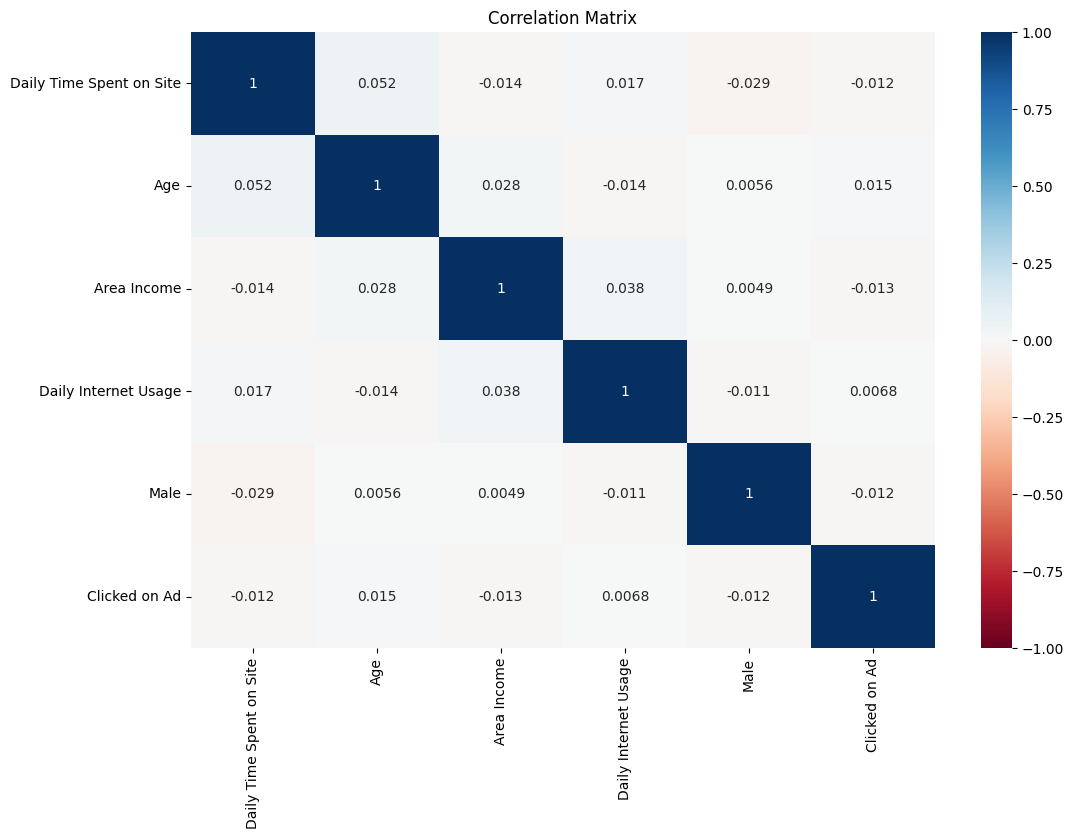

In [ ]:
plt.figure(figsize=(12, 8))
s = sns.heatmap(df.select_dtypes(include=['number']).corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

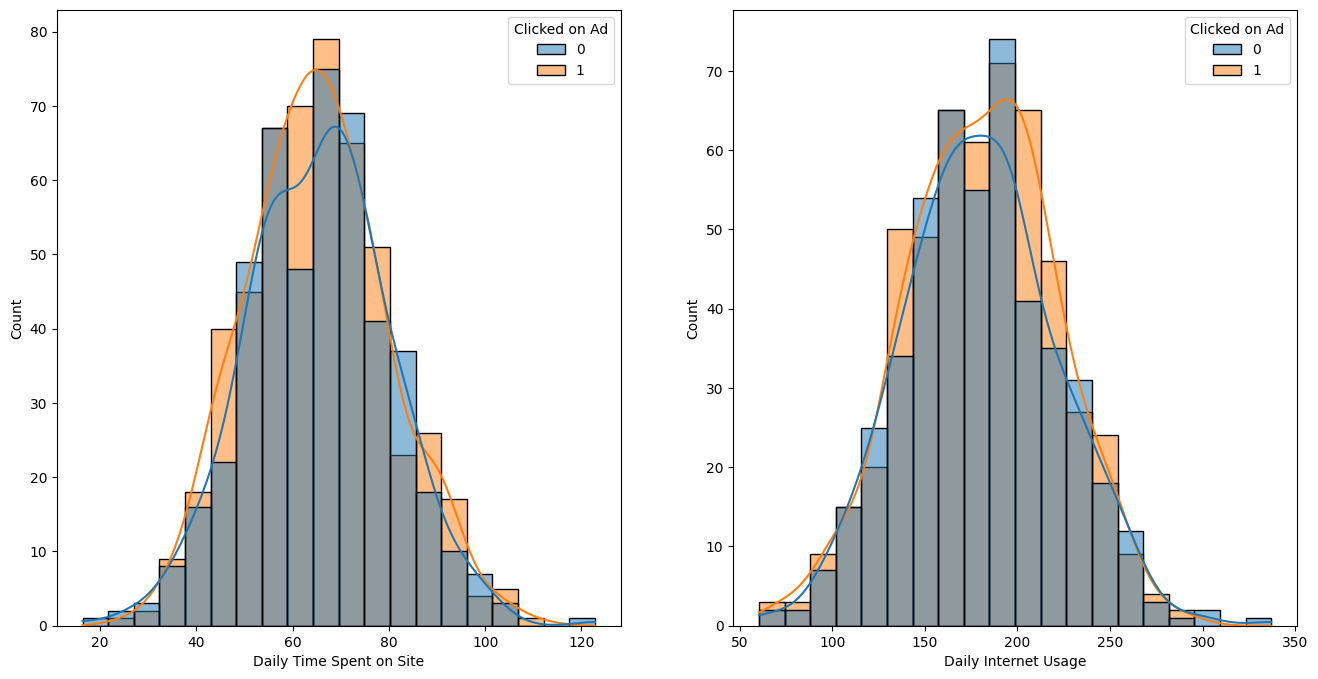

In [ ]:
# Let's have a look at the relation between 'daily spent time on site' and 'ad click'
# also the relation between 'daily internet usage' and 'ad click'

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
# plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Daily Time Spent on Site', bins=20, kde=True, hue='Clicked on Ad', ax=axs[0])
sns.histplot(data=df, x='Daily Internet Usage', bins=20, kde=True, hue='Clicked on Ad', ax=axs[1])

plt.show()

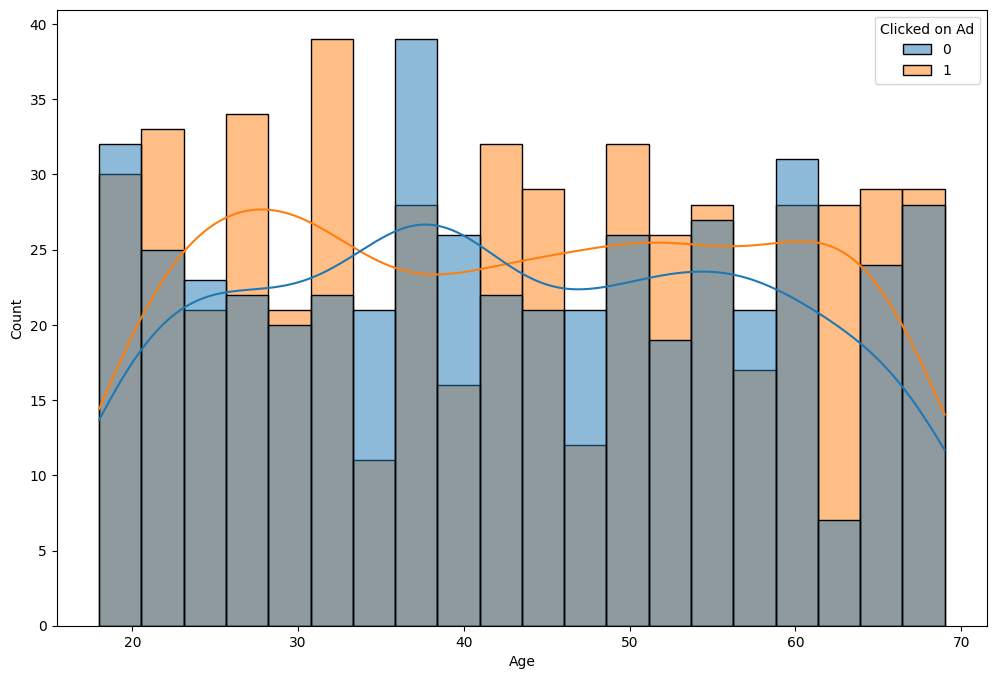

In [ ]:
#Let's have a look at the distribution of the age group

# fig, axs = plt.subplots(1, 2, figsize=(16, 8))
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Age', bins=20, kde=True, hue='Clicked on Ad')
plt.show()

In [ ]:
X = df.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
lr_predict = lr_model.predict(X_test)

print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.41      0.18      0.25       148
           1       0.48      0.74      0.59       152

    accuracy                           0.47       300
   macro avg       0.45      0.46      0.42       300
weighted avg       0.45      0.47      0.42       300



In [ ]:
from sklearn.ensemble import RandomForestClassifier

regr_model = RandomForestClassifier(min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      max_features='sqrt')

regr_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=50, n_estimators=150, n_jobs=-1,
                       oob_score=True)

In [ ]:
y_pred = regr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.23      0.30       148
           1       0.49      0.72      0.59       152

    accuracy                           0.48       300
   macro avg       0.47      0.48      0.44       300
weighted avg       0.47      0.48      0.45       300



In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svm_predict = clf.predict(X_test)
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.42      0.21      0.28       148
           1       0.48      0.72      0.58       152

    accuracy                           0.47       300
   macro avg       0.45      0.47      0.43       300
weighted avg       0.46      0.47      0.43       300



In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
nb_predict = nb.predict(X_test)
print(classification_report(y_test,nb_predict))

              precision    recall  f1-score   support

           0       0.41      0.22      0.28       148
           1       0.48      0.70      0.57       152

    accuracy                           0.46       300
   macro avg       0.44      0.46      0.43       300
weighted avg       0.44      0.46      0.43       300

